In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)



image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 44.0ms
Speed: 3.8ms preprocess, 44.0ms inference, 184.4ms postprocess per image at shape (1, 3, 640, 480)


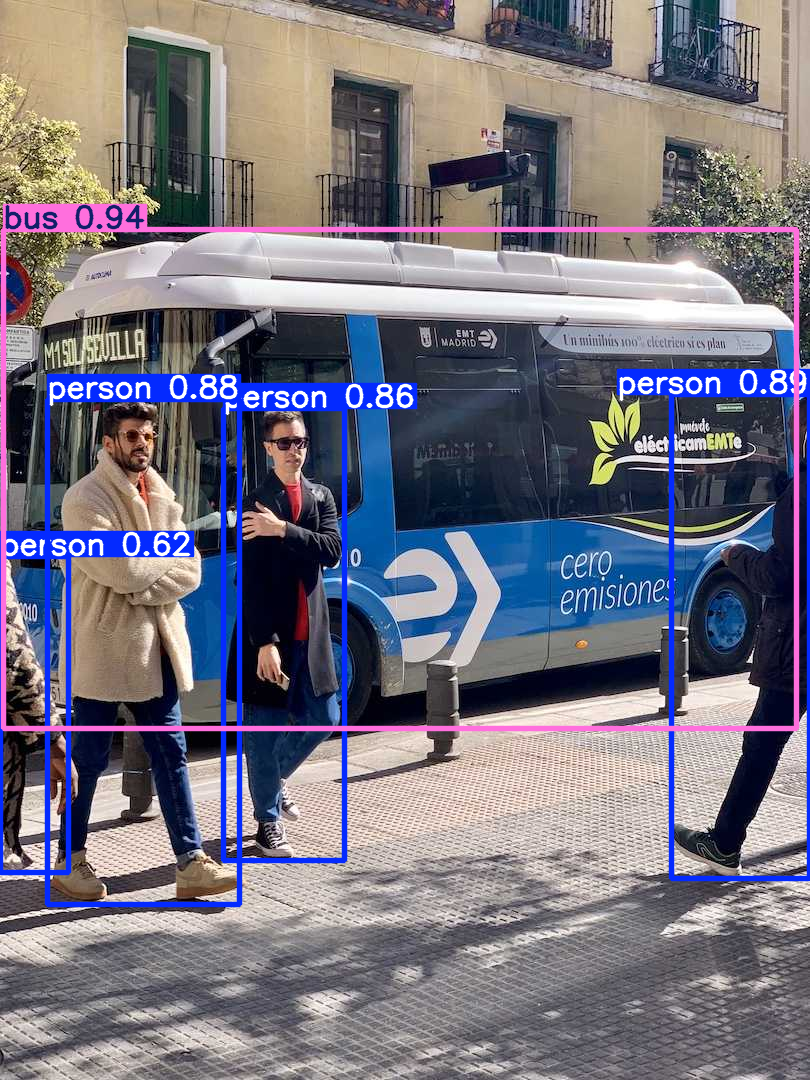

In [5]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
results = model("bus.jpg")
results[0].show()

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dEiwDxGXswcLVEdVq550")
project = rf.workspace("object-detection-yxxz2").project("fire-smoke-zjqzo")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Smoke-1 in yolov11:: 100%|██████████| 8012/8012 [00:04<00:00, 1962.59it/s]


In [9]:
dataset.location

'/content/Fire-Smoke-1'

In [12]:
!yolo task=detect mode=train epochs=25 data={dataset.location}/data.yaml model="yolo11n.pt"  imgsz=640

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Fire-Smoke-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

In [17]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt source=/content/a.jpg

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/a.jpg: 384x640 1 smoke, 45.0ms
Speed: 4.0ms preprocess, 45.0ms inference, 204.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict



0: 384x640 1 smoke, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


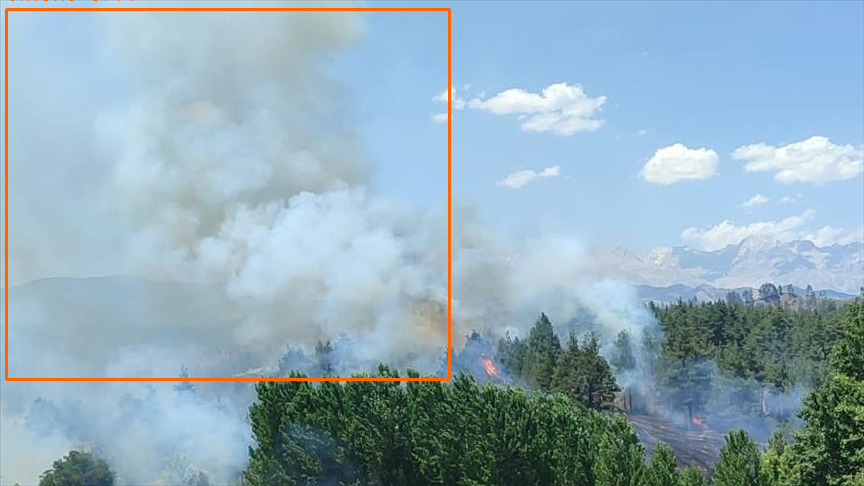

True

In [22]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# 🔥 Modeli yükle (.pt dosyanı doğru yaz)
model = YOLO('/content/runs/detect/train3/weights/best.pt')

# 🖼 Görseli oku
img_path = '/content/a.jpg'  # Görsel yolunu doğru yaz
img = cv2.imread(img_path)

# 🔍 Tahmin yap
results = model(img)[0]

# 📦 Tahmin kutularını çiz
for box in results.boxes:
    cls_id = int(box.cls[0])
    confidence = float(box.conf[0])
    label = model.names[cls_id]
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 100, 255), 2)
    cv2.putText(img, f"{label} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 100, 255), 2)

# 📸 Sonucu göster
cv2_imshow(img)
cv2.imwrite('/content/detect_output.jpg', img)

